---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h3><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h3>    

<h1 align="center">Lecture 3.24 (Data Visualization-IV)</h1>

## _Data Visualization with Matplotlib_

**Read Documentation for details:** 
https://matplotlib.org/stable/users/index.html

<img align="left" width="500" height="500"  src="images/intromatlab.png"  >
<img align="right" width="400" height="500"  src="images/matplotlibadvantages.png"  >

## Learning agenda of this notebook
1. Recap:
    - Anatomy of a Figure
    - Line, Bar, Scatter, Pie Chart and Histogram
2. Box-plot
3. Violin plot
4. Heatmap
5. Subplots

## 1. Recap

### a. Anatomy of a Figure
<img align="center" width="700" height="500"  src="images/anotomyoffig.png"  >

### b. Line Chart
<img align="center" width="700" height="500"  src="images/linechart.png"  >

### c. Bar Chart
<img align="left" width="450" height="500"  src="images/vbar.png"  >
<img align="right" width="450" height="500"  src="images/hbar.png"  >

### d. Histogram
<img align="left" width="575" height="500"  src="images/myhistogram.png"  >
<img align="right" width="375" height="500"  src="images/mybargraph.png"  >

### e. Scatter Chart
<img align="center" width="700" height="500"  src="images/scatterchart.png"  >

### f. Pie Chart
<img align="center" width="700" height="500"  src="images/mypiechart.png"  >

To begin, let's install the Matplotlib library. We'll use the `matplotlib.pyplot` module for basic plots like line & bar charts. It is often imported with the alias `plt`. 

In [1]:
# To install this library in Jupyter notebook
import sys
#!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install matplotlib --quiet

In [2]:
import matplotlib
matplotlib.__version__ , matplotlib.__path__

('3.4.3',
 ['/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib'])

## 2. Boxplot
<img align="centre" width="700" height="750"  src="images/iqr2.png"  >


<br><br><br><br><br>

<img align="center" width="500" height="200"  src="images/boxplot.png"  >

In [3]:
import pandas as pd
df = pd.read_csv("datasets/boxplot.csv")
df.head()

,rollno,name,address,gender,group,session,age,scholarship,machine_learning,data_science,big_data
0,MS01,SAADIA,Lahore,female,group B,MORNING,28,2562,33,81,74
1,MS02,JUMAIMA,Islamabad,female,group C,AFTERNOON,33,2800,27,90,88
2,MS03,ARIFA,Karachi,female,group A,EVENING,34,3500,24,95,93
3,MS04,SAADIA,Lahore,female,group A,MOR,44,2000,37,57,44
4,MS05,DANISH,Peshawer,male,group C,AFTERNOON,54,2100,39,78,55


In [4]:
df.shape

(50, 11)

In [5]:
df.data_science.min()

42

In [6]:
df.data_science.max()

95

In [7]:
df.data_science.median()

70.0

In [8]:
# measuring quantiles for Data Science
df.data_science.quantile([.25, .5, .75])

0.25    57.25
0.50    70.00
0.75    77.25
Name: data_science, dtype: float64

In Matplotlib, `boxplot()` is the core function to create box plot. Below are some of the important parameters of the function:

- `x`: Array or a sequence of vectors. The input data.
- `vert`: Set as True or False. The default value is True, which displays the boxes vertically.
- `labels`: Sets the labels for each dataset.
- `notch`: Set as True or False. the default value is False. If True, the parameter will produce a notched box plot.
- `widths`: Sets the width of the box.
- `patch_artist`: Set as True or False. the default value is False. If False, the parameter will produce boxes with the Line2D artist. Otherwise, the boxes will be drawn with Patch artists.

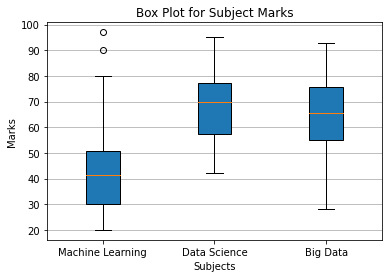

In [9]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Create figure and axes objects
fig = plt.figure()
ax = fig.add_subplot()

# Get the dataset(s)
machine_learning = list(df['machine_learning'])
data_science = list(df['data_science'])
big_data = list(df['big_data'])
values = [machine_learning, data_science, big_data]

xlabels=["Machine Learning", "Data Science", "Big Data"]
ax.boxplot(x=values,  patch_artist=True, labels = xlabels)

# title and axis labels
ax.set_title('Box Plot for Subject Marks')
ax.set_xlabel('Subjects')
ax.set_ylabel('Marks')


# add horizontal grid lines
ax.yaxis.grid(True)

plt.show()

## 3. Violin Plot
Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots.

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

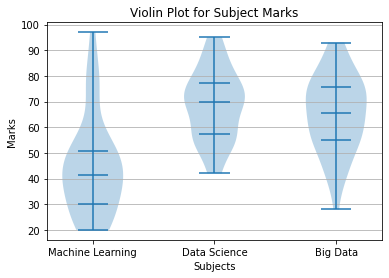

In [14]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Create figure and axes objects
fig = plt.figure()
ax = fig.add_subplot()

# Get the dataset(s)
machine_learning = list(df['machine_learning'])
data_science = list(df['data_science'])
big_data = list(df['big_data'])
values = [machine_learning, data_science, big_data]

xlabels=["Machine Learning", "Data Science", "Big Data"]

quantiles= [[0.25,0.75], [0.25,0.75], [0.25,0.75]]
ax.violinplot(dataset=values, showmedians=True, quantiles=quantiles)

# title and axis labels
ax.set_title('Violin Plot for Subject Marks')
ax.set_xlabel('Subjects')
ax.set_ylabel('Marks')

ax.set_xticks([1,2,3])
ax.set_xticklabels(xlabels)

# add horizontal grid lines
ax.yaxis.grid(True)

plt.show()

## 4. Heat Map
Heat map Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.
>- A heatmap is a useful chart that we can use to show the relationship between two variables. 
>- A heatmap is used to visualize 2-dimensional data like a matrix or a table using colors.

In [15]:
import numpy as np
data_set = np.random.randint(0 , 255, 100).reshape(10,10)
data_set

array([[183,  35,  73,  10, 168,  79, 135, 224,  45, 235],
       [119,  12,  63,  92, 231,  25, 111,  33,   2,  94],
       [251,   1, 168, 249, 159,   2, 154, 107,  49, 238],
       [192, 228,  91,  54, 241,  42,  14, 187, 143,  85],
       [202, 232, 137,  60, 177,  78,   7, 237, 235, 162],
       [ 51,  26, 127, 222, 146,  42, 110, 196,  18, 138],
       [233, 118, 139, 185, 200, 214,  92, 212,  21, 136],
       [201, 148, 100, 229,  56, 176, 100,  99, 128,  96],
       [ 28,  74,  69, 166, 169, 157, 176, 157, 114, 248],
       [128, 242, 218,   5, 230, 196,  17, 106,  86, 186]])

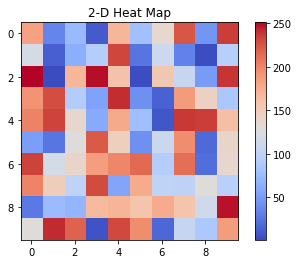

In [18]:
plt.imshow(X=data_set, cmap='coolwarm')
plt.colorbar()
plt.title( "2-D Heat Map" )
plt.show()

## 5. Creating Multiple Plots (Sub-Plots) within a Figure
- A single matplotlib figure object may contain multiple subplots (axes objects) organized in a grid. 
- To create a subplot, just call the `plt.subplot()` method, and specify the number of rows and columns as shown below:
```
fig, <ax objects> = plt.subplots(rows, cols)
```
- Where rows and cols are integers that control the subplot layout. The `<ax objects>` needs to have dimensions that correspond to rows and cols.

- The index of the subplot you want to draw on, starts from 1, then left to right, and top to bottom
- **Note** that pyplot keeps track of the currently active subplot (which you can get a reference to by calling `plt.gca()`), so when you call the `plot` function, it draws on the *active* subplot.

    
    
If a 2 row by 2 column array of plots is created, the <ax object> must to be arrayed as shown below:
 
```
fig, ( (ax1,ax2), (ax3,ax4) ) = plt.subplots(2,2)
```
    
If a 2 row by 3 column array of plots is created, the <ax objects> must be arrayed to correspond to these dimensions:
```
fig, ( (ax1,ax2,a3), (ax4,ax5,ax6) ) = plt.subplots(2, 3)   
```


Figure(432x288)


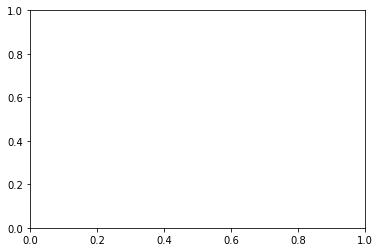

In [19]:
fig, ax = plt.subplots()
print(fig)

Figure(432x288)


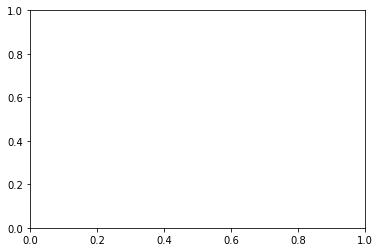

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
print(fig)

Figure(432x288)


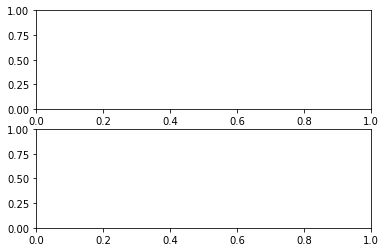

In [21]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
print(fig)

Figure(432x288)


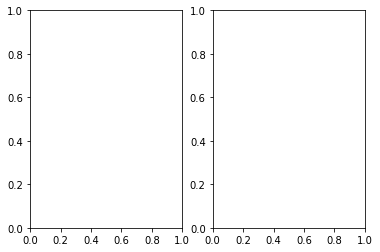

In [22]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
print(fig)

Figure(432x288)


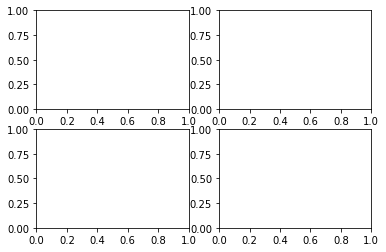

In [23]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
print(fig)

Figure(432x288)


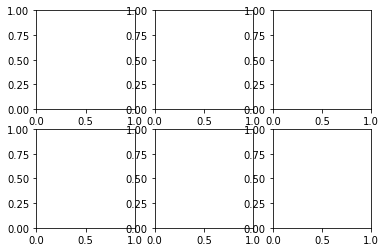

In [24]:
fig, ( (ax1,ax2,ax3), (ax4,ax5,ax6) ) = plt.subplots(2, 3) 
print(fig)

**Example 1:**

In [25]:
x = np.linspace(-1, 1, 30)
x

array([-1.        , -0.93103448, -0.86206897, -0.79310345, -0.72413793,
       -0.65517241, -0.5862069 , -0.51724138, -0.44827586, -0.37931034,
       -0.31034483, -0.24137931, -0.17241379, -0.10344828, -0.03448276,
        0.03448276,  0.10344828,  0.17241379,  0.24137931,  0.31034483,
        0.37931034,  0.44827586,  0.51724138,  0.5862069 ,  0.65517241,
        0.72413793,  0.79310345,  0.86206897,  0.93103448,  1.        ])

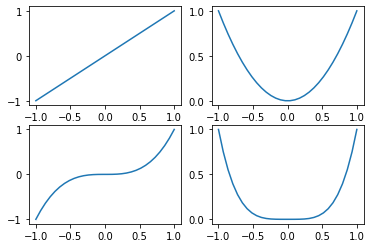

In [26]:
x = np.linspace(-1, 1, 30)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x,x)       # 1st subplot = top left
ax2.plot(x, x**2)   # 2nd subplot = top right
ax3.plot(x,x**3)    # 3rd subplot = bottom left
ax4.plot(x,x**4)    # 4th subplot = bottom right

**Example 2:**

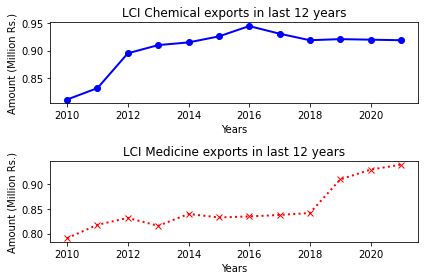

In [27]:
from matplotlib import pyplot as plt
chemical_exports = [0.810, 0.831, 0.895, 0.91, 0.915, 0.926, 0.945, 0.931, 0.919, 0.921, 0.920, 0.919]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
medicine_exports = [0.791, 0.818, 0.832, 0.816, 0.840, 0.833, 0.835, 0.838, 0.842, 0.910, 0.930, 0.940]


fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(years, chemical_exports, label='Chemicals', marker='o', c='b', ls='-', lw=2) 
ax2.plot(years, medicine_exports, label='Medicines', marker='x', c='r', ls=':', lw=2) 

#Note the use of `set_`
ax1.set_title("LCI Chemical exports in last 12 years")
ax1.set_xlabel("Years")
ax1.set_ylabel("Amount (Million Rs.)")


ax2.set_title("LCI Medicine exports in last 12 years")
ax2.set_xlabel("Years")
ax2.set_ylabel("Amount (Million Rs.)")

plt.tight_layout()
plt.show()